# get_universe說明

## Import and Setting

In [1]:
import pandas as pd
import datetime
import tejapi
import os
import numpy as np

# set tej_key and base
os.environ['TEJAPI_KEY'] = "your key" 
os.environ['TEJAPI_BASE'] = "https://api.tej.com.tw"

# set date
start='2023-01-01'
end='2023-10-24'

from logbook import Logger, StderrHandler, INFO
log_handler = StderrHandler(format_string='[{record.time:%Y-%m-%d %H:%M:%S.%f}]: ' +
                            '{record.level_name}: {record.func_name}: {record.message}',
                            level=INFO)
log_handler.push_application()
log = Logger('get_universe')

## get_universe
用來取得特定的股票池（<font color=DeepPink>使用此函數會消耗API流量</font>）。


### **zipline.sources.TEJ_Api_Data.<font color=DeepPink>get_universe</font>** 
```python
(start,
 end=datetime.datetime.now().date().strftime('%Y-%m-%d'),
 trading_calendar = get_calendar('TEJ_XTAI'),
 **kwargs)
```

<!-- <table><tr><td bgcolor=green>Parameters</td></tr></table> -->

### Parameters
---
- **start**(*datetime or str*)－Start date.
- **end**(*datetime or str, optional*)－This defaults to the current date.
- **trading_calendar**(*TradingCalendar, optional*)－設置交易日曆。預設是`get_calendar('TEJ_XTAI')`。
- **available kwargs properties（至少需要指定一個，若沒指定則返回全樣本）**
  - **mkt**(*list or str*)－市場別。
    - valid mkt：`['TWSE', 'OTC']`。
    - 若在**證券交易所**掛牌，註記為「TWSE」；若在**櫃買中心**掛牌，註記為「OTC」。
    - **市場別（mkt）** 、**板塊別（mkt_bd_c、mkt_bd_e）**的概念請參考以下說明：[市場別（mkt） 與板塊別（mkt_bd_c、mkt_bd_e）](#mktandmkt_bd)。
  - **mkt_bd_c**(*list or str*)－板塊別(中)。
    - valid mkt_bd_c：`['上市一般版', '上櫃一般版', '創新版']`。
    - 若在**上市一般板**，註記為「上市一般版」；若在**上市創新板**，註記為「創新版」；若在**上櫃一般板**，註記為「上櫃一般版」。
  - **mkt_bd_e**(*list or str*)－板塊別(英)。
    - valid mkt_bd_e：`['TSE', 'OTC', 'TIB']`。
    - 若在**上市一般板**，註記為「TSE」；若在**上市創新板**，註記為「TIB」；若在**上櫃一般板**，註記為「OTC」。
  - **stktp_c**(*list or str*)－證券種類(中)。
    - valid stktp_c：`['指數', '普通股-海外', '普通股', '特別股', '封閉型基金', 'ETF', 'REIT', '國外ETF','開放式基金', '台灣存託憑證']`。
    - `'普通股-海外'`：僅包含F股或KY股。`'普通股'`：不含F股或KY股。若同時想取得所有普通股，請使用stktp_c=`['普通股-海外', '普通股']`。
  - **stktp_e**(*list or str*)－證券種類(英)。
    - valid stktp_e：`['Index', 'Common Stock-Foreign', 'Common Stock', 'Preferred Stock', 'Close End Fund', 'ETF', 'REIT', 'Foreign ETF', 'Open End Fund', 'TDR']`。
    - `'Common Stock-Foreign'`：僅包含F股或KY股。`'Common Stock'`：不含F股或KY股。若同時想取得所有普通股，請使用stktp_e=`['Common Stock-Foreign', 'Common Stock']`。
  - **main_ind_c**(*list or str*)－主產業別(中)。（請輸入完整字串，例如：'M1100 水泥工業'）
    <details>
    <summary><font color=Blue>點選查看valid main_ind_c</font>：</summary>
    <pre>
    
    -  M1100 水泥工業
    -  M1200 食品工業
    -  M1300 塑膠工業
    -  M1400 紡織纖維
    -  M1500 電機機械
    -  M1600 電器電纜
    -  M1700 化學生技醫療
    -  M1800 玻璃陶瓷
    -  M1900 造紙工業
    -  M2000 鋼鐵工業
    -  M2100 橡膠工業
    -  M2200 汽車工業
    -  M2300 電子工業
    -  M2500 建材營造
    -  M2600 航運業
    -  M2700 觀光餐旅
    -  M2800 金融業
    -  M2900 貿易百貨
    -  M3000 証券
    -  M3500 綠能環保
    -  M3600 數位雲端
    -  M3700 運動休閒
    -  M3800 居家生活
    -  M9700 油電燃氣業
    -  M9900 其他
    -  OTC12 OTC 食品工業
    -  OTC13 OTC 塑膠工業
    -  OTC14 OTC 紡織纖維
    -  OTC15 OTC 電機機械
    -  OTC16 OTC 電器電纜
    -  OTC17 OTC 化學生技
    -  OTC18 OTC 玻璃
    -  OTC20 OTC 鋼鐵工業
    -  OTC21 OTC 橡膠類
    -  OTC22 OTC 汽車類
    -  OTC23 OTC 電子類
    -  OTC25 OTC 建材營造
    -  OTC26 OTC 航運業
    -  OTC27 OTC 觀光餐旅
    -  OTC28 OTC 金融業
    -  OTC29 OTC 百貨類
    -  OTC30 OTC 證券類
    -  OTC32 文化創意業
    -  OTC33 OTC 農業科技
    -  OTC34 OTC 電子商務
    -  OTC35 OTC 綠能環保
    -  OTC36 OTC 數位雲端
    -  OTC37 OTC 運動休閒
    -  OTC38 OTC 居家生活
    -  OTC89 OTC 其它
    -  OTC97 OTC 油電燃氣業
    -  金融與證券業
    -  一般產業 

    </pre>
    </details>
    
  - **main_ind_e**(*list or str*)－主產業別(英)。（請輸入完整字串，例如：'M1100 Cement'）
    <details>
    <summary><font color=Blue>點選查看valid main_ind_e</font>：</summary>
    <pre>
    
    -  M1100 Cement
    -  M1200 Foods
    -  M1300 Plastics
    -  M1400 Textiles
    -  M1500 Electric Machinery
    -  M1600 Electrical and Cable
    -  M1700 Chemical Biotechnology & Medical Care
    -  M1800 Glass and Ceramics
    -  M1900 Paper and Pulp
    -  M2000 Iron and Steel
    -  M2100 Rubber
    -  M2200 Automobile
    -  M2300 Electronics
    -  M2500 Building Material and Construction
    -  M2600 Shipping and Transportation
    -  M2700 Tourism
    -  M2800 Financial Industry
    -  M2900 Trading and Consumers' Goods
    -  M3000 Securities
    -  M3500 TSE Green Energy and Environmental Services
    -  M3600 TSE Digital and Cloud Services
    -  M3700 TSE Sports and Leisure
    -  M3800 TSE Household
    -  M9700 Oil Gas and Electricity
    -  M9900 Others
    -  OTC12 OTC Foods
    -  OTC13 OTC Plastic
    -  OTC14 OTC Textile
    -  OTC15 OTC Electronical
    -  OTC16 OTC Wire & Cable
    -  OTC17 OTC Chemical & Biotech
    -  OTC18 OTC Glass
    -  OTC20 OTC Steel
    -  OTC21 OTC Rubbers
    -  OTC22 OTC Automobile
    -  OTC23 OTC Electronic
    -  OTC25 OTC Construction
    -  OTC26 OTC Transporation
    -  OTC27 OTC Tourism
    -  OTC28 OTC Banking
    -  OTC29 OTC Retailing
    -  OTC30 OTC Securities
    -  OTC32 Cultural & Creative Industry
    -  OTC33 OTC Agricultural Science and Technology
    -  OTC34 OTC E-commerce
    -  OTC35 OTC Green Energy and Environmental Services
    -  OTC36 OTC Digital and Cloud Services
    -  OTC37 OTC Sports and Leisure
    -  OTC38 OTC Household
    -  OTC89 OTC Others
    -  OTC97 OTC Gas and Electricity Industry
    -  Financial and Securities Industry
    -  General Industry 

    </pre>
    </details>
    
  - **sub_ind_c**(*list or str*)－子產業別(中)。（請輸入完整字串，例如：'M1721 化學工業'）
    <details>
    <summary><font color=Blue>點選查看valid sub_ind_c</font>：</summary>
    <pre>

    -  M1721 化學工業
    -  M1722 生技醫療業
    -  M2324 半導體業
    -  M2325 電腦及週邊設備業
    -  M2326 光電業
    -  M2327 通信網路業
    -  M2328 電子零組件
    -  M2329 電子通路業
    -  M2330 資訊服務業
    -  M2331 其他電子業
    -  M2335 綠能環保
    -  M2336 數位雲端
    -  O1721 OTC 化學工業
    -  O1722 OTC 生技醫療
    -  O2324 OTC 半導體業
    -  O2325 OTC 電腦及週邊設備業
    -  O2326 OTC 光電業
    -  O2327 OTC 通信網路業
    -  O2328 OTC 電子零組件
    -  O2329 OTC 電子通路業
    -  O2330 OTC 資訊服務業
    -  O2331 OTC 其他電子業
  
    </pre>
    </details>
    
  - **sub_ind_e**(*list or str*)－子產業別(英)。（請輸入完整字串，例如：'M1721 Chemical'）
    <details>
    <summary><font color=Blue>點選查看valid sub_ind_e</font>：</summary>
    <pre>
    
    -  M1721 Chemical
    -  M1722 Biotechnology and Medical Care
    -  M2324 Semiconductor
    -  M2325 Computer and Peripheral Equipment
    -  M2326 Optoelectronic
    -  M2327 Communications and Internet
    -  M2328 Electronic Parts and Components
    -  M2329 Electronic Products Distribution
    -  M2330 Information Service
    -  M2331 Other Electronic
    -  M2335 TSE Green Energy and Environmental Services
    -  M2336 TSE Digital and Cloud Services
    -  O1721 OTC Chemical Industry
    -  O1722 OTC Biotechnology and Medical Care Industry
    -  O2324 OTC Semiconductor Industry
    -  O2325 OTC Computer and Peripheral Equipment Industry
    -  O2326 OTC Optoelectronic Industry
    -  O2327 OTC Communications and Internet Industry
    -  O2328 OTC Electronic Parts and Components Industry
    -  O2329 OTC Electronic Products Distribution Industry
    -  O2330 OTC Information Service Industry
    -  O2331 OTC Other Electronic
 
    </pre>
    </details>
        
  - **idx_id**(*list or str*)－指數名稱。（請輸入指數就好，後面的中文不需輸入，例如：'IX0001'）
    
    <details>
    <summary><font color=Blue>點選查看valid idx_id</font>：</summary>
    <pre> 
    
    - IX0001	加權指數
    - IX0002	台灣50指數
    - IX0003	台灣中型指數
    - IX0006	台灣高股息指數
    - IX0010	水泥工業類指數
    - IX0011	食品工業類指數
    - IX0012	塑膠工業類指數
    - IX0016	紡織纖維類指數
    - IX0017	電機機械類指數
    - IX0018	電器電纜類指數
    - IX0019	化學生技醫療類指數
    - IX0020	化學工業指數
    - IX0021	生技醫療指數
    - IX0022	玻璃陶瓷類指數
    - IX0023	造紙工業類指數
    - IX0024	鋼鐵工業類指數
    - IX0025	橡膠類指數
    - IX0026	汽車工業類指數
    - IX0027	電子類指數
    - IX0028	半導體業指數
    - IX0029	電腦及週邊設備業指數
    - IX0030	光電業指數
    - IX0031	通信網路業指數
    - IX0032	電子零組件業指數
    - IX0033	電子通路業指數
    - IX0034	資訊服務業指數
    - IX0035	其他電子業指數
    - IX0036	建材營造類指數
    - IX0037	航運業類指數
    - IX0038	觀光事業類指數
    - IX0039	金融保險類指數
    - IX0040	貿易百貨類指數
    - IX0041	油電燃氣業指數
    - IX0042	其他類指數
    - IX0043	OTC 指數
    - IX0044	OTC 紡織纖維類
    - IX0045	OTC 電機機械類
    - IX0046	OTC 鋼鐵類
    - IX0047	OTC 電子類
    - IX0048	OTC 營造建材類
    - IX0049	OTC 航運類
    - IX0050	OTC 觀光類指數
    - IX0051	OTC 化學工業指數
    - IX0052	OTC 生技醫療指數
    - IX0053	OTC 半導體業指數
    - IX0054	OTC 電腦及週邊設備業指數
    - IX0055	OTC 光電業指數
    - IX0056	OTC 通信網路業指數
    - IX0057	OTC 電子零組件指數
    - IX0058	OTC 電子通路業指數
    - IX0059	OTC 資訊服務業指數
    - IX0060	富櫃五十指數
    - IX0063	線上遊戲指數
    - IX0075	文化創意業指數
    - IX0082	臺灣證券交易所公司治理100 指數
    - IX0085	櫃買治理
    - IX0099	其他電子業指數
    - IX0118	櫃買富櫃200指數

    </pre>
    </details>

   
### Returns
---
List of symbols.

### Return type
---
*list*

### Note
---
- `main_ind_c`的特殊產業
  - main_ind_c=`'金融與證券業'`：**屬於**以下4種產業的所有公司
    - M2800 金融業
    - OTC28 OTC 金融業
    - M3000 証券
    - OTC30 OTC 證券類
  - main_ind_c=`'一般產業'`：**非**以下4種產業的所有公司
    - M2800 金融業
    - OTC28 OTC 金融業
    - M3000 証券
    - OTC30 OTC 證券類
- `main_ind_e`的特殊產業
  - main_ind_e=`'Financial and Securities Industry'`：**屬於**以下4種產業的所有公司
    - M2800 Financial Industry
    - OTC30 OTC Securities
    - M3000 Securities
    - OTC28 OTC Banking
  - main_ind_e=`'General Industry'`：**非**以下4種產業的所有公司
    - M2800 Financial Industry
    - OTC30 OTC Securities
    - M3000 Securities
    - OTC28 OTC Banking

<span id="mktandmkt_bd"></span>
## 市場別（mkt） 與板塊別（mkt_bd_c、mkt_bd_e）
---
以 **'普通股'** 為例（不含F股或KY股）：

- **'普通股'** （**stktp_c='普通股'**）：包含在**證券交易所（mkt='TWSE'）掛牌的普通股** 與在**櫃買中心（mkt='OTC'）掛牌的普通股**。
  - 在**證券交易所掛牌的普通股**：包含**上市一般板（mkt_bd_e='TSE'、mkt_bd_c='上市一般版'）** 與 **上市創新板（mkt_bd_e='TIB'、mkt_bd_c='創新版'）**。
  - 在**櫃買中心掛牌的普通股**：包含**上櫃一般板（mkt_bd_e='OTC'、mkt_bd_c='上櫃一般版'）**，不含興櫃。

- 統整上述關係：
> 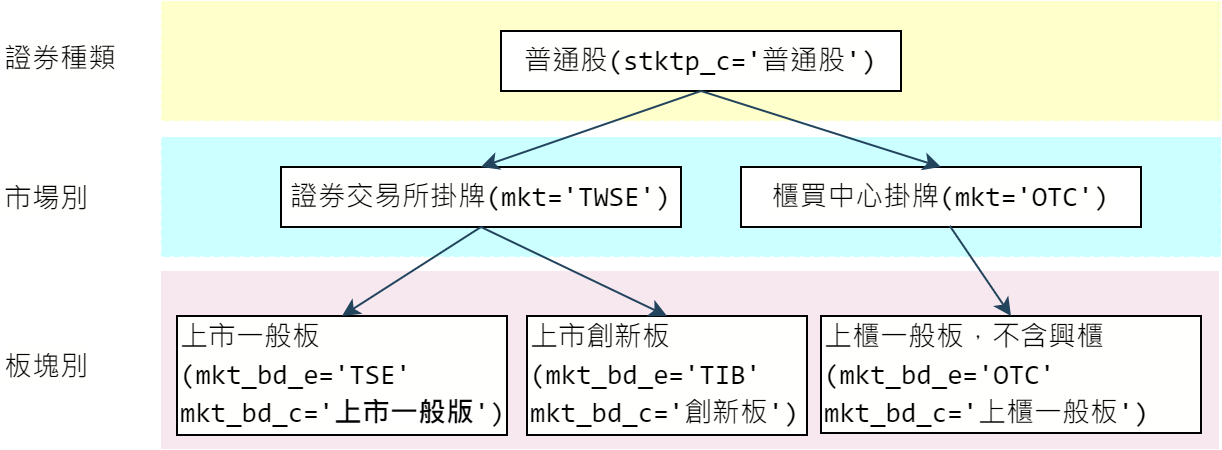

## Import get_universe

In [2]:
from zipline.sources.TEJ_Api_Data import get_universe

<span id="menu"></span>
## Examples

包含以下九個範例：
1. [case1 取曾經在上市一般板+上櫃一般板的證券](#case1)
2. [case2 取曾經在證券交易所／櫃買中心掛牌的證券](#case2)
3. [case3 取曾經上市+上櫃的普通股](#case3)
4. [case4 取子產業別曾經為"M2324 半導體業"的證券](#case4)
5. [case5 取子產業別曾經為"M2324 Semiconductor"&"M2325 Computer and Peripheral Equipment"的證券](#case5)
6. [case6 取證券種類為"ETF"及"普通股"且掛牌於證券交易所的證券](#case6)
7. [case7 取曾經為"IX0002"（台灣50指數）成份股的證券](#case7)
8. [case8 取主產業別曾經為"M1100 水泥工業"且為"IX0006"（台灣高股息指數）成份股的證券](#case8)
9. [case9 取非金融業的普通股](#case9)

<span id="case1"></span>
### case1 取曾經在上市一般板+上櫃一般板的證券（不限於普通股）

這樣的使用方式不會取出`mkt_bd_e`=TIB（創新板）的證券

[Return to Examples Menu](#menu)

In [3]:
# 僅顯示前10筆
get_universe(start, end, mkt_bd_e=['TSE','OTC'])[0:10]

[2024-02-07 03:53:53.679057]: INFO: get_universe_TW: Filters：{'mkt_bd_e': ['TSE', 'OTC']}


Currently used TEJ API key call quota 587/9223372036854775807 (0.0%)
Currently used TEJ API key data quota 63565100/9223372036854775807 (0.0%)


['0050',
 '0051',
 '0052',
 '0053',
 '0055',
 '0056',
 '0057',
 '0061',
 '006201',
 '006203']

<span id="case2"></span>
### case2 取曾經在證券交易所／櫃買中心掛牌的證券（不限於普通股）
[Return to Examples Menu](#menu)

#### 取曾經在證券交易所掛牌的證券

In [4]:
# 僅顯示前10筆
get_universe(start, end, mkt=['TWSE'])[0:10]

[2024-02-07 03:53:57.107778]: INFO: get_universe_TW: Filters：{'mkt': ['TWSE']}


Currently used TEJ API key call quota 589/9223372036854775807 (0.0%)
Currently used TEJ API key data quota 64021031/9223372036854775807 (0.0%)


['0050',
 '0051',
 '0052',
 '0053',
 '0055',
 '0056',
 '0057',
 '0061',
 '006203',
 '006204']

#### 取曾經在櫃買中心掛牌的證券

In [5]:
# 僅顯示前10筆
get_universe(start, end, mkt=['OTC'])[0:10]

[2024-02-07 03:54:00.019207]: INFO: get_universe_TW: Filters：{'mkt': ['OTC']}


Currently used TEJ API key call quota 591/9223372036854775807 (0.0%)
Currently used TEJ API key data quota 64476962/9223372036854775807 (0.0%)


['006201',
 '00679B',
 '00687B',
 '00694B',
 '00695B',
 '00696B',
 '00697B',
 '00718B',
 '00719B',
 '00720B']

<span id="case3"></span>
### case3 取曾經上市+上櫃的普通股（不含F股或KY股）

- case1與case2取出的證券**不限於普通股**，若**僅想取出普通股**（不含F股或KY股），則可以新增`stktp_c=['普通股']`的條件。
  

- 以下兩種方式皆能取得曾經上市+上櫃的普通股（不含F股或KY股）：
  - `get_universe(start, end, mkt=['TWSE','OTC'], stktp_c=['普通股'])`
  - `get_universe(start, end, mkt_bd_e=['TSE','OTC','TIB'], mkt=['TWSE','OTC'], stktp_c=['普通股'])`
  
  

- 若需要排除**上市創新板（mkt_bd='TIB'）** 的普通股（不含F股或KY股），可使用：
  - `get_universe(start, end, mkt_bd_e=['TSE','OTC'], mkt=['TWSE','OTC'], stktp_c=['普通股'])`

[Return to Examples Menu](#menu)

In [6]:
# 僅顯示前10筆
get_universe(start, end, mkt=['TWSE','OTC'], stktp_c=['普通股'])[0:10]

[2024-02-07 03:54:02.654693]: INFO: get_universe_TW: Filters：{'mkt': ['TWSE', 'OTC'], 'stktp_c': ['普通股']}


Currently used TEJ API key call quota 591/9223372036854775807 (0.0%)
Currently used TEJ API key data quota 64476962/9223372036854775807 (0.0%)


['1101',
 '1102',
 '1103',
 '1104',
 '1108',
 '1109',
 '1110',
 '1201',
 '1203',
 '1210']

In [7]:
get_universe(start, end, mkt_bd_e=['TSE','OTC','TIB'], mkt=['TWSE','OTC'], stktp_c=['普通股'])[0:10]

[2024-02-07 03:54:05.673290]: INFO: get_universe_TW: Filters：{'mkt_bd_e': ['TSE', 'OTC', 'TIB'], 'mkt': ['TWSE', 'OTC'], 'stktp_c': ['普通股']}


Currently used TEJ API key call quota 591/9223372036854775807 (0.0%)
Currently used TEJ API key data quota 64476962/9223372036854775807 (0.0%)


['1101',
 '1102',
 '1103',
 '1104',
 '1108',
 '1109',
 '1110',
 '1201',
 '1203',
 '1210']

<span id="case4"></span>
### case4 取子產業別曾經為"M2324 半導體業"的證券
[Return to Examples Menu](#menu)

In [8]:
# 僅顯示前10筆
get_universe(start, end, sub_ind_c=['M2324 半導體業'])[0:10]

[2024-02-07 03:54:09.247120]: INFO: get_universe_TW: Filters：{'sub_ind_c': ['M2324 半導體業']}


Currently used TEJ API key call quota 593/9223372036854775807 (0.0%)
Currently used TEJ API key data quota 65119296/9223372036854775807 (0.0%)


['2302',
 '2303',
 '2329',
 '2330',
 '2337',
 '2338',
 '2342',
 '2344',
 '2351',
 '2363']

<span id="case5"></span>
          
### case5 取子產業別曾經為"M2324 Semiconductor"&"M2325 Computer and Peripheral Equipment"的證券
[Return to Examples Menu](#menu)

In [9]:
# 僅顯示前10筆
get_universe(start, end, sub_ind_e=['M2324 Semiconductor',
                                    'M2325 Computer and Peripheral Equipment'])[0:10]

[2024-02-07 03:54:11.567247]: INFO: get_universe_TW: Filters：{'sub_ind_e': ['M2324 Semiconductor', 'M2325 Computer and Peripheral Equipment']}


Currently used TEJ API key call quota 593/9223372036854775807 (0.0%)
Currently used TEJ API key data quota 65119296/9223372036854775807 (0.0%)


['2301',
 '2302',
 '2303',
 '2305',
 '2324',
 '2329',
 '2330',
 '2331',
 '2337',
 '2338']

<span id="case6"></span>
### case6 取證券種類為"ETF"及"普通股"（不含F股或KY股）且掛牌於證券交易所的證券
[Return to Examples Menu](#menu)

In [10]:
# 僅顯示前10筆
get_universe(start, end, stktp_c=['ETF', '普通股'], mkt=['TWSE'])[0:10]

[2024-02-07 03:54:14.027597]: INFO: get_universe_TW: Filters：{'stktp_c': ['ETF', '普通股'], 'mkt': ['TWSE']}


Currently used TEJ API key call quota 595/9223372036854775807 (0.0%)
Currently used TEJ API key data quota 65162021/9223372036854775807 (0.0%)


['0050',
 '0051',
 '0052',
 '0053',
 '0055',
 '0056',
 '0057',
 '006203',
 '006204',
 '006208']

<span id="case7"></span>
### case7 取曾經為"IX0002"（台灣50指數）成份股的證券
[Return to Examples Menu](#menu)

In [11]:
# 僅顯示前10筆
get_universe(start, end, idx_id='IX0002')[0:10]

[2024-02-07 03:54:16.921081]: INFO: get_universe_TW: Filters：{'idx_id': ['IX0002']}


Currently used TEJ API key call quota 595/9223372036854775807 (0.0%)
Currently used TEJ API key data quota 65162021/9223372036854775807 (0.0%)


['1101',
 '1216',
 '1301',
 '1303',
 '1326',
 '1402',
 '1590',
 '1605',
 '2002',
 '2207']

<span id="case8"></span>
### case8 取主產業別曾經為"M1100 水泥工業"且為"IX0006"（台灣高股息指數）成份股的證券
[Return to Examples Menu](#menu)

In [12]:
# 僅顯示前10筆
get_universe(start, end, main_ind_c='M1100 水泥工業', idx_id='IX0006')[0:10]

[2024-02-07 03:54:18.284225]: INFO: get_universe_TW: Filters：{'main_ind_c': 'M1100 水泥工業', 'idx_id': ['IX0006']}


Currently used TEJ API key call quota 595/9223372036854775807 (0.0%)
Currently used TEJ API key data quota 65162021/9223372036854775807 (0.0%)


['1102']

<span id="case9"></span>
### case9 取非金融業的普通股（不含F股或KY股）
[Return to Examples Menu](#menu)

In [13]:
# 僅顯示前10筆
get_universe(start, end, main_ind_c=['一般產業',
                                     'M3500 綠能環保',
                                     'M3600 數位雲端',
                                     'OTC35 OTC 綠能環保',
                                     'OTC36 OTC 數位雲端']
             , stktp_c='普通股')[0:10]

[2024-02-07 03:54:21.025443]: INFO: get_universe_TW: Filters：{'main_ind_c': '一般產業', 'stktp_c': '普通股'}


Currently used TEJ API key call quota 599/9223372036854775807 (0.0%)
Currently used TEJ API key data quota 65343704/9223372036854775807 (0.0%)


['1101',
 '1102',
 '1103',
 '1104',
 '1108',
 '1109',
 '1110',
 '1201',
 '1203',
 '1210']